## Chasing 100 parses

This is a quick notebook to demonstrate how risk/reward strategies in gearing for parses are:
1. a function of a few key variables like the predicted dps distribution means and variances between possible gear items, and
2. matter *basically fuck all* for the number of attempts we get and the dps difference between items

Essentially, ret has too much RNG loaded into it, that you're coinflipping way harder every fight than the differences in near-bis bits of gear, even when you're chasing an exceptional parse.

tl:dr if two items are near bis to even around the 10dps level, wear whatever you want. It matters so goddamn little for ret. Holy fuck what a depressing class.

### Some math (sounds of people in ecstacy, drugs being sniffed, people chanting euphorically)

So, you are chasing a giga parse on a boss. Is it ever worth going for an item with more variance in dps, but a smaller overall dps mean?

The classic example is Band of Devastation vs Shapeshifters ring. Devastation has more dps stats on it, and some really nice haste, Shapeshifters has 20 Expertise Rating.
On average, Shapeshifters outperforms Devastation - but Devastation in theory has a higher upper threshold if you just happen to roll good dodge RNG.

#### RNG'd off your face mate

In ret dps, you're subject to a ton of RNG. You're constantly rolling on:
- crit chance
- SoC proc rate
- windfury proc rate
- mongoose proc rate
- DST proc rate
- dodge chance

These are all roughly Poisson distributed in how frequently they occur. Enough of these random variables will combine to something that can be approximated with a Gaussian, or normal distribution.

### So what's the better max parse?

So, you've got two possible items in a slot, and two possible dps distributions you're going to sample from. The trouble is, you only get to sample from them a small number of times as you kill the current phase's bosses. Maybe 20 times or so in any particular phase.

So, given 20 samplings from those two Gaussians, you'll have a max value that has a lot of randomness to it. We want to eliminate some of that randomness, so let's simulate several thousand players doing the same shit with each possible gear item.

Over the course of many simulated experiments, what percent of the time does a given item give you the better max?

### That stupid shit will depend on:

1. The variance and means of each dps distribution, and
2. the number of attempts you have on the boss.

To see what we mean with 2. there, consider that if you got to kill the boss several million times, you'd very likely sample a huge range of the dps distribution, including the very highest.

This basically means if you could run an unimaginably large number of kills, you'd parse the best with zero hit and zero expertise, and low crit. Just high AP, the only static dps variable for your output, and let god RNG do the rest.

But of course, we don't have unlimited kills on a boss. Just a few tens.

So you gotta play for consistency to a point. But it's perhaps possible that some slight tradeoff is worth it if the means and variances of the two items' dps distributions stack up a certain way.

# Let's sim it because life is meaningless

In [35]:
import numpy as np
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

plt.rc('figure', facecolor='w')

def get_better_parser(n_tries, n_sims, mu1, sigma1, mu2, sigma2):
    """
    Function to compare two different approximate items assuming Gaussian dps outcomes.
    
    The item dps distributions are determined by the mu and sigma variables 
    indicating dps mean and sqrt(variance).
    
    We assume the player has n_tries at killing the boss.
    
    Over a number of simulations n_sims, which item is the better?
    
    We present the final number with a binomial error on the result.
    
    We also visualise the two dps distributions we resample from.
    """
    fig = plt.figure(figsize=(10,5))
    x = np.linspace(mu - 3.5*sigma, mu + 3.5*sigma, 100)
    plt.plot(x, stats.norm.pdf(x, mu1, sigma1), label=f'mu={mu1}, sigma={sigma1}')
    plt.plot(x, stats.norm.pdf(x, mu2, sigma2), label=f'mu={mu2}, sigma={sigma2}')
    plt.ylabel("density")
    plt.xlabel("DPS")
    plt.legend(loc="upper right")

    plt.show()
    
    max_with_1 = 0
    max_with_2 = 0

    for i in range(0, int(n_sims)):
        s_1 = np.random.normal(mu1, sigma1, n_tries)
        max_1 = max(s_1)
    
        s_2 = np.random.normal(mu2, sigma2, n_tries)
        max_2 = max(s_2)
        
        if max_1 > max_2:
            max_with_1 += 1
        else:
            max_with_2 += 1  
    
    p = max_with_1/n_sims
    p_error = math.sqrt(p*(1-p)/n_sims)
    p_pc = round((max_with_1/n_sims)*100, 2)
    p_error_pc = round(p_error*100, 2)
    print(f'Given {n_tries} attempts at the boss, the first item has better max parse in ({p_pc} +/- {p_error_pc})% of cases over {int(n_sims)} simulations')

# An approximation to shapeshifters/devastation

Let's plug in some numbers that roughly give the kinds of means and variance differences you'll see between these two shit rings.

We'll sim this over 10k players with devastation, 10k with shapeshifters.

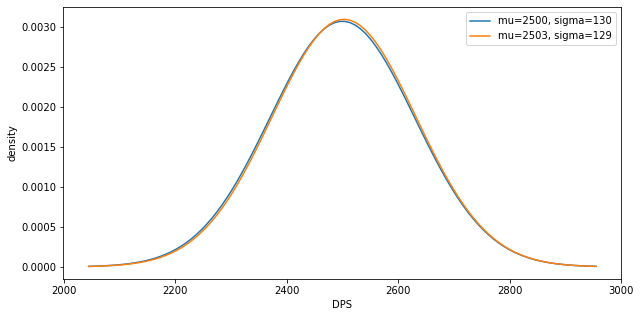

Given 20 attempts at the boss, the first item has better max parse in (49.24 +/- 0.5)% of cases over 10000 simulations


In [34]:
get_better_parser(20, 10e3,
                  2500, 130,  # lower average, higher variance
                  2503, 129,  # higher average, lower variance
                 )

So, we saw that over 20 kills, most of the time shapeshifters wins out, but it's still *incredibly close to a coinflip* because ret is stupid. It's almost within error of 50/50.

What happens if we gave each player 20k attempts at the boss instead?

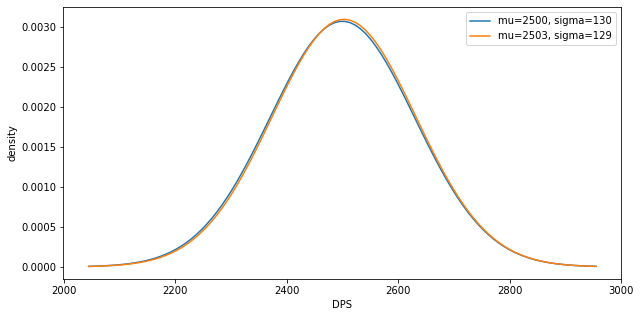

Given 20000 attempts at the boss, the first item has better max parse in (51.12 +/- 0.5)% of cases over 10000 simulations


In [37]:
get_better_parser(20000, 10e3,
                  2500, 130,  # lower average, higher variance
                  2503, 129,  # higher average, lower variance
                 )

Well, now Devastation is slightly favoured to give the better result - but it's so fucking stupidly close to 50/50.

# Conclusion

What do we draw from this?

Essentially, ret has too many random variables in dps output beyond our control for gear choices like this to meaningfully affect parse chasing.

Just run what makes you comfortable or feels t